### Business Objective
The primary objective is to identify potential customers for a newly launched luxury SUV. By analyzing user data from a social network, the car company aims to target advertisements more effectively, maximizing their marketing efforts and increasing sales of the SUV.

### Constraints
There may be imbalanced classes (more users not purchasing the SUV compared to those who do).
- Purchased
- 0 :   257
- 1 :   143


#### What We Want to Achieve
High-Accuracy Predictions: model that accurately predicts whether a user is likely to purchase the luxury SUV based on their characteristics.

In [59]:
import pandas as pd
df=pd.read_csv("NB_Car_Ad.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [74]:
df.shape

(400, 5)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [64]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [66]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [68]:
df.value_counts('Purchased')

Purchased
0    257
1    143
Name: count, dtype: int64

In [70]:
df.value_counts('Age')

Age
35    32
37    20
26    16
42    16
41    16
39    15
40    15
47    14
48    14
27    13
38    13
46    12
28    12
36    12
30    11
31    11
49    10
29    10
24     9
32     9
33     9
45     7
59     7
60     7
19     7
20     7
52     6
34     6
25     6
23     6
58     6
57     5
53     5
18     5
22     5
50     4
54     4
21     4
43     3
55     3
56     3
51     3
44     2
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


- **Gender is categorical column**
- **Convert to numerical using LabelENcoder**

In [86]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [88]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [94]:
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

In [96]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [98]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(X_train,y_train)

BernoulliNB()

In [118]:
y_pred=model.predict(X_test)

In [121]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [127]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

Confusion Matrix:
 [[52  0]
 [28  0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


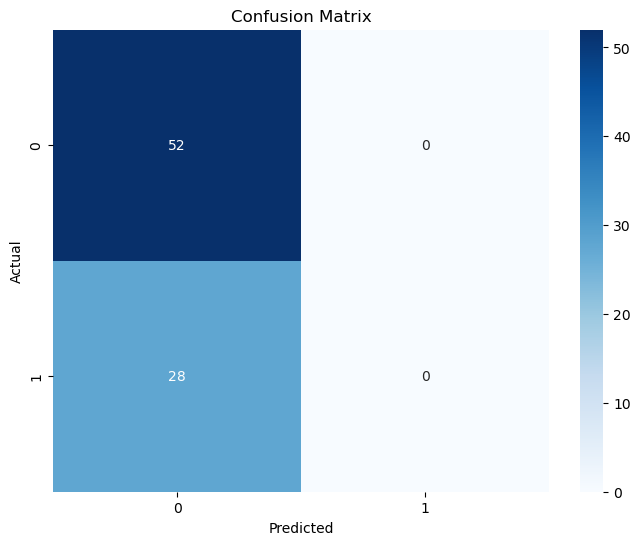

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


- TN: the model correctly predict that 52 users did not purchase SUV
- FN : the model predicted 28 users not purchase SUV actually they purchased SUV

### Addressing class imbalance

In [145]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(pd.Series(y_train_resampled).value_counts())


Purchased
0    205
1    205
Name: count, dtype: int64


In [147]:

model_balanced = BernoulliNB()
model_balanced.fit(X_train_resampled, y_train_resampled)  # or X_train_balanced, y_train_balanced


BernoulliNB()

In [153]:

y_pred_balanced = model_balanced.predict(X_test)

accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f'Accuracy (Balanced Model): {accuracy_balanced:.2f}')

print(classification_report(y_test, y_pred_balanced))

conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
print("Confusion Matrix (Balanced Model):\n", conf_matrix_balanced)


Accuracy (Balanced Model): 0.53
              precision    recall  f1-score   support

           0       0.69      0.48      0.57        52
           1       0.39      0.61      0.47        28

    accuracy                           0.53        80
   macro avg       0.54      0.54      0.52        80
weighted avg       0.59      0.53      0.53        80

Confusion Matrix (Balanced Model):
 [[25 27]
 [11 17]]
